# **LA County Median Household Income**
## **Jessica Melendez**

In this notebook I will look at median household income in LA County over the last year. This data is important to our research because it will help inform us of different trends and patterns we see across LA County and it will aid us in looking at which areas fall above or below median household income. This data in particular looks at LA County median household income over the last year separated by census tracts and county subdivisions. 

## First, I will download and import my data from census reporter

In [3]:
import pandas as pd

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

In [4]:
LA_income = gpd.read_file('Data/LA_income.geojson')

## Perfect! Now, let's get more familiar with the data.

How big is the data set?

In [5]:
LA_income.shape

(142, 5)

Great! What does the top of the data set look like?

In [6]:
LA_income.head()

,geoid,name,B19013001,"B19013001, Error",geometry
0,05000US06037,"Los Angeles County, CA",68044.0,347.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,16000US0600212,"Acton, CA",97857.0,7939.0,"MULTIPOLYGON (((-118.25990 34.49589, -118.2579..."
2,16000US0600394,"Agoura Hills, CA",122998.0,7910.0,"MULTIPOLYGON (((-118.79962 34.14005, -118.7967..."
3,16000US0600450,"Agua Dulce, CA",106875.0,28122.0,"MULTIPOLYGON (((-118.37894 34.46763, -118.3783..."
4,16000US0600884,"Alhambra, CA",61384.0,2132.0,"MULTIPOLYGON (((-118.16528 34.06244, -118.1652..."


Okay, now let's see a sample of the tail end of the data.

In [7]:
LA_income.tail()

,geoid,name,B19013001,"B19013001, Error",geometry
137,16000US0684774,"West Puente Valley, CA",75856.0,8204.0,"MULTIPOLYGON (((-117.99004 34.05045, -117.9895..."
138,16000US0684780,"West Rancho Dominguez, CA",60155.0,4727.0,"MULTIPOLYGON (((-118.25442 33.90622, -118.2542..."
139,16000US0684921,"West Whittier-Los Nietos, CA",76397.0,4204.0,"MULTIPOLYGON (((-118.08884 33.96718, -118.0888..."
140,16000US0685292,"Whittier, CA",77270.0,3192.0,"MULTIPOLYGON (((-118.05774 34.02465, -118.0562..."
141,16000US0685614,"Willowbrook, CA",43781.0,4772.0,"MULTIPOLYGON (((-118.25427 33.92946, -118.2533..."


Let's see a random sample!

In [8]:
LA_income.sample()

,geoid,name,B19013001,"B19013001, Error",geometry
110,16000US0671806,"Sierra Madre, CA",100988.0,9941.0,"MULTIPOLYGON (((-118.06820 34.17295, -118.0681..."


## Let's get familiar with plotting now!

<AxesSubplot:>

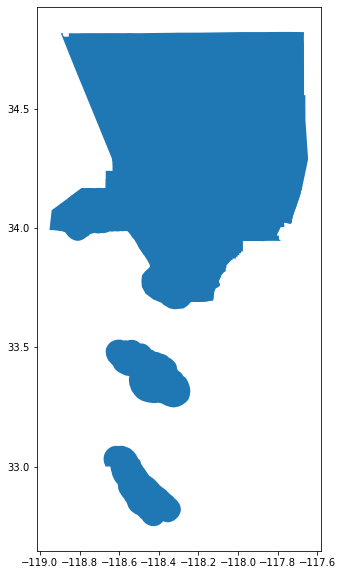

In [9]:
LA_income.plot(figsize=(10,10))

Now look at that! LA county looks good!
Let's see, what data types are in this data set?

In [10]:
LA_income.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             142 non-null    object  
 1   name              142 non-null    object  
 2   B19013001         142 non-null    float64 
 3   B19013001, Error  141 non-null    float64 
 4   geometry          142 non-null    geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 5.7+ KB


We have some summarized vision of the data set now. Great! Let's get familiar with the FIPS code now since we're looking at county data from the census.

In [11]:
LA_income.geoid.head()

0      05000US06037
1    16000US0600212
2    16000US0600394
3    16000US0600450
4    16000US0600884
Name: geoid, dtype: object

Okay, the first row looks different. This first row is for the entire county. We can do without it since it represents a different scale. Let's drop the first row but let's take a look at the top of the data set before we do just to make sure. 

In [12]:
LA_income.head()

,geoid,name,B19013001,"B19013001, Error",geometry
0,05000US06037,"Los Angeles County, CA",68044.0,347.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,16000US0600212,"Acton, CA",97857.0,7939.0,"MULTIPOLYGON (((-118.25990 34.49589, -118.2579..."
2,16000US0600394,"Agoura Hills, CA",122998.0,7910.0,"MULTIPOLYGON (((-118.79962 34.14005, -118.7967..."
3,16000US0600450,"Agua Dulce, CA",106875.0,28122.0,"MULTIPOLYGON (((-118.37894 34.46763, -118.3783..."
4,16000US0600884,"Alhambra, CA",61384.0,2132.0,"MULTIPOLYGON (((-118.16528 34.06244, -118.1652..."


Perfect! Now let's drop that first row with the index 0.

In [13]:
LA_income = LA_income.drop([0])

Let's see what that looks like now that we've dropped that row.

In [14]:
LA_income.head()

,geoid,name,B19013001,"B19013001, Error",geometry
1,16000US0600212,"Acton, CA",97857.0,7939.0,"MULTIPOLYGON (((-118.25990 34.49589, -118.2579..."
2,16000US0600394,"Agoura Hills, CA",122998.0,7910.0,"MULTIPOLYGON (((-118.79962 34.14005, -118.7967..."
3,16000US0600450,"Agua Dulce, CA",106875.0,28122.0,"MULTIPOLYGON (((-118.37894 34.46763, -118.3783..."
4,16000US0600884,"Alhambra, CA",61384.0,2132.0,"MULTIPOLYGON (((-118.16528 34.06244, -118.1652..."
5,16000US0601150,"Alondra Park, CA",61865.0,5976.0,"MULTIPOLYGON (((-118.34382 33.89339, -118.3435..."


Look at that! Still looks good.

## Let's dive into some of this census data a bit more!

Okay, let's take a look at our data. Our last data set was way too big! That being said, do we need to drop any of our columns? Let's view our columns as a list then. 

In [15]:
list(LA_income)

['geoid', 'name', 'B19013001', 'B19013001, Error', 'geometry']

Not bad! We have our geoid, the city names... okay, what is 'B19013001'? Yikes! Let's look it up! 

Nothing crazy, that's good news! Looks like 'B19013001' is code for 'Median Household Income.' and "B19013001, Error' stands for inflation adjusted dollars... Let's  rename these columns now.

In [16]:
LA_income.columns = ['geoid',
 'name',
 'median hhi-2020',
 'In 2019 adj. Dollars',
 'geometry']

Now that we've renamed them, let's see what these columns look like on a table!

In [17]:
LA_income.head()

,geoid,name,median hhi-2020,In 2019 adj. Dollars,geometry
1,16000US0600212,"Acton, CA",97857.0,7939.0,"MULTIPOLYGON (((-118.25990 34.49589, -118.2579..."
2,16000US0600394,"Agoura Hills, CA",122998.0,7910.0,"MULTIPOLYGON (((-118.79962 34.14005, -118.7967..."
3,16000US0600450,"Agua Dulce, CA",106875.0,28122.0,"MULTIPOLYGON (((-118.37894 34.46763, -118.3783..."
4,16000US0600884,"Alhambra, CA",61384.0,2132.0,"MULTIPOLYGON (((-118.16528 34.06244, -118.1652..."
5,16000US0601150,"Alondra Park, CA",61865.0,5976.0,"MULTIPOLYGON (((-118.34382 33.89339, -118.3435..."


Let's isolate a column and see what a single column's data looks like.

In [18]:
LA_income['median hhi-2020'].head()

1     97857.0
2    122998.0
3    106875.0
4     61384.0
5     61865.0
Name: median hhi-2020, dtype: float64

Look's great! I wonder what the mean median household income for 2020 is?

In [19]:
LA_income['median hhi-2020'].mean()

84695.72340425532

Whoa! Look at that! looks like mean for median household income is estimated to be around $84,696.

What about the median?

In [20]:
LA_income['median hhi-2020'].median()

75827.0

Looks like $75,827 is the median for household median income in 2020

## Interesting... Let's use some of those quant. skills from our 1st year as MURP students. You got it! Let's display some stats!

In [21]:
LA_income['median hhi-2020'].describe()

count       141.000000
mean      84695.723404
std       35718.179714
min       38600.000000
25%       61384.000000
50%       75827.000000
75%       99083.000000
max      250001.000000
Name: median hhi-2020, dtype: float64

Look at that! In 2020, the minimum median household income was 38,600 dollars unadjusted for inflation. The maximum median household income in 2020 was 250,001 dollars. Wow! I wonder who those people are. Must be nice to have all that MONEY! Let's get into some of these stats before we map out these income differences. I want to know where these people making 250,000 reside at!

Let's plot these numbers as a histogram with 50 bins. That should give us a good view of these stats.

<AxesSubplot:ylabel='Frequency'>

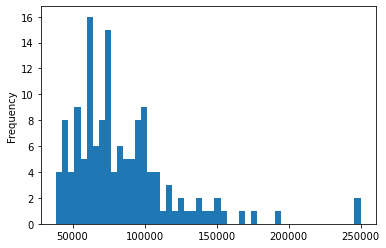

In [26]:
LA_income['median hhi-2020'].plot.hist(bins=50)

Interesting... looks like there's a high number of people making somewhat close to 50,000 dollars. And yup! Those people making 250,000 dollars seem to be outliers. Look at that!

## Let's start sorting some data now.

We should probably set our values in order from highest to lowest and look at a sample of 10 just to see what that does to our data.

In [27]:
LA_income_sorted = LA_income.sort_values(by='median hhi-2020',ascending = False)

Let's see that sample now...

In [36]:
LA_income_sorted[['geoid','median hhi-2020']].head(10)

,geoid,median hhi-2020
97,16000US0662602,250001.0
54,16000US0633518,246042.0
89,16000US0655380,194543.0
59,16000US0639003,175788.0
105,16000US0668224,166607.0
79,16000US0645400,153023.0
78,16000US0645246,150747.0
98,16000US0662644,150135.0
17,16000US0607946,146250.0
135,16000US0684438,140850.0


Cool! Now the column is displaying median household income in ascending order. 

## Are we ready to try some mapping??

Let's get into it and plot that sample of 10 on the map!

<AxesSubplot:>

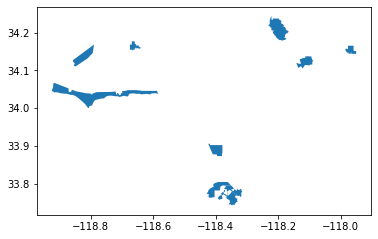

In [28]:
LA_income_sorted.head(10).plot()

That looks nice! Woooow! Let's make it nicer. Let's sort a sample of 100 in ascending order to map out the differences in median household income across LA County.

<AxesSubplot:>

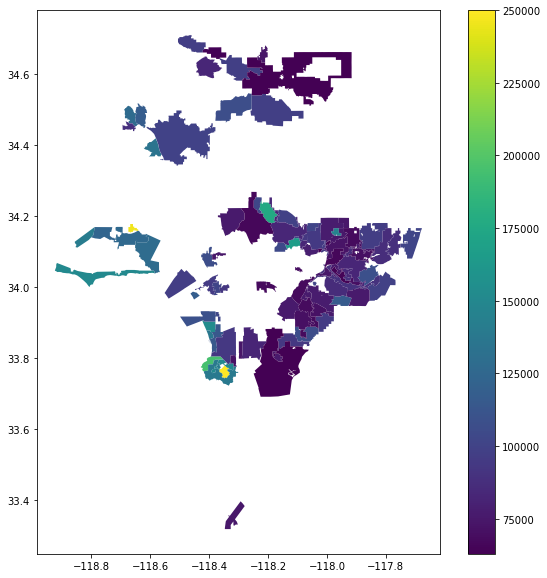

In [29]:
LA_income_sorted.head(100).plot(figsize=(10,10),column='median hhi-2020',legend=True)

## Shall we look into filtering and subsetting our data?

Let's get into it! Let's see some of our data per row. For starters, let's see if the data captured any places where the median household income totaled the min 38600.000000 dollars. 

In [50]:
LA_income[LA_income['median hhi-2020']== 38600.000000]

,geoid,name,median hhi-2020,In 2019 adj. Dollars,geometry
136,16000US0684592,"Westmont, CA",38600.0,2856.0,"MULTIPOLYGON (((-118.31775 33.93090, -118.3177..."


We have to create a new variable and see if there is any record of it. But let's try it.

In [56]:
LA_income_min= LA_income[LA_income['median hhi-2020']== 38600.000000]

In [57]:
print('There are ' + str(len(LA_income_min)) + ' places with 38600.000000 in them')

There are 1 places with 38600.000000 in them


Interesting... there is 1 record of a place with the median houshold income of 38600.000000 dollars in them. Great! Let's keep it moving.

Let's try normalizing the data, but before we begin let's take a look at our list again.

In [58]:
list(LA_income)

['geoid', 'name', 'median hhi-2020', 'In 2019 adj. Dollars', 'geometry']

Perfect! We have our geoid, city, median household income, 2019 adjust income, and our geometry (or latitutdes and longitudes). Let's take a look at our stats once more so we can make some comparisons in our maps

In [59]:
LA_income['median hhi-2020'].describe()

count       141.000000
mean      84695.723404
std       35718.179714
min       38600.000000
25%       61384.000000
50%       75827.000000
75%       99083.000000
max      250001.000000
Name: median hhi-2020, dtype: float64

## Look at that, memorize it... Now let's try mapping this out by percentiles! 

<AxesSubplot:>

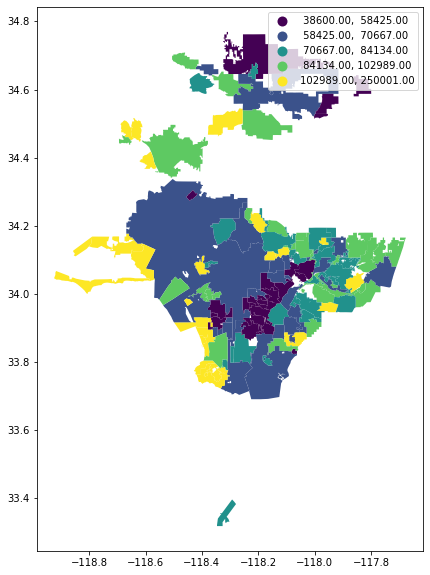

In [63]:
LA_income.plot(figsize=(12,10),
                 column='median hhi-2020',
                 legend=True, 
                 scheme='quantiles')